In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
df.isnull().sum().sort_values(ascending = False)

salary            67
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
dtype: int64

In [4]:
df['salary'] = df['salary'].fillna(df['salary'].mean())

In [5]:
df.isnull().sum().sort_values(ascending = False)

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [6]:
df.drop(['sl_no','salary'],axis = 1,inplace = True)

In [7]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [8]:
df['status']= df['status'].map({'Placed':1,'Not Placed':0})
df['workex']= df['workex'].map({'Yes':1,'No':0})
df['gender']= df['gender'].map({'M':1,'F':0})
df['hsc_b']= df['hsc_b'].map({'Central':1,'Others':0})
df['ssc_b']= df['ssc_b'].map({'Central':1,'Others':0})
df['degree_t']= df['degree_t'].map({'Sci&Tech':0,'Comm&Mgmt':1,'Others':2})
df['specialisation']= df['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})
df['hsc_s']= df['hsc_s'].map({'Commerce':0,'Science':1,'Arts':2})

In [9]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,0,58.00,0,0,55.0,1,58.80,1
1,1,79.33,1,78.33,0,1,77.48,0,1,86.5,0,66.28,1
2,1,65.00,1,68.00,1,2,64.00,1,0,75.0,0,57.80,1
3,1,56.00,1,52.00,1,1,52.00,0,0,66.0,1,59.43,0
4,1,85.80,1,73.60,1,0,73.30,1,0,96.8,0,55.50,1


In [10]:
X = df[['ssc_p','hsc_p','degree_p','workex','mba_p','etest_p','gender','degree_t','specialisation']]
y = df['status']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 101)
print(X_train.shape)
print(X.shape)
print(y_train.shape)
print(y.shape)

(172, 9)
(215, 9)
(172,)
(215,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,recall_score,precision_score

print("Accuracy:",accuracy_score(y_test, prediction)*100)
print("Precision:",precision_score(y_test, prediction)*100)
print("Recall:",recall_score(y_test, prediction)*100)

Accuracy: 76.74418604651163
Precision: 81.48148148148148
Recall: 81.48148148148148


In [15]:
k=[5,6,7,8,9,10,11,12,13,14,15]
preds=[]
for val in k:
    knn=KNeighborsClassifier(n_neighbors=val)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    preds.append(accuracy_score(y_test,y_pred))
preds

[0.9069767441860465,
 0.8837209302325582,
 0.9069767441860465,
 0.9302325581395349,
 0.9069767441860465,
 0.8604651162790697,
 0.9069767441860465,
 0.8837209302325582,
 0.8837209302325582,
 0.8837209302325582,
 0.9069767441860465]

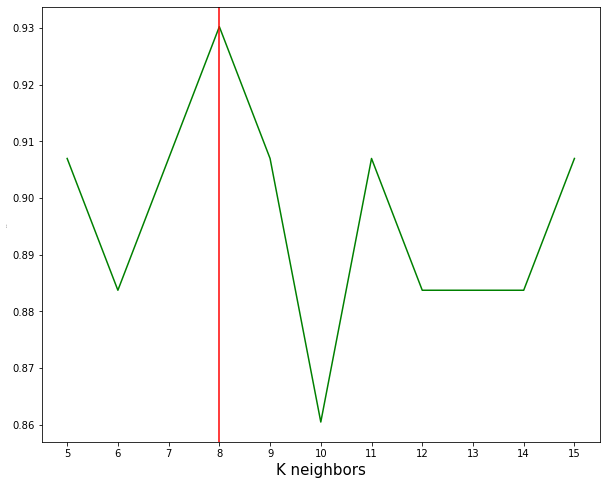

In [16]:
plt.figure(figsize=(10,8))
plt.plot(k,preds,color='green')
plt.xlabel('K neighbors',size=15)
plt.ylabel('Accuracy',size=1)
plt.xticks(np.arange(5,16))
plt.axvline(8,color='red')

In [17]:
from sklearn.svm import SVC

In [18]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

In [19]:
print("Accuracy:",accuracy_score(y_test, svc_pred)*100)
print("Precision:",precision_score(y_test, svc_pred)*100)
print("Recall:",recall_score(y_test, svc_pred)*100)

Accuracy: 86.04651162790698
Precision: 83.87096774193549
Recall: 96.29629629629629


In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
print("Accuracy:",accuracy_score(y_test, pred)*100)
print("Precision:",precision_score(y_test, pred)*100)
print("Recall:",recall_score(y_test, pred)*100)

Accuracy: 79.06976744186046
Precision: 82.14285714285714
Recall: 85.18518518518519


In [22]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,0,58.00,0,0,55.0,1,58.80,1
1,1,79.33,1,78.33,0,1,77.48,0,1,86.5,0,66.28,1
2,1,65.00,1,68.00,1,2,64.00,1,0,75.0,0,57.80,1
3,1,56.00,1,52.00,1,1,52.00,0,0,66.0,1,59.43,0
4,1,85.80,1,73.60,1,0,73.30,1,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,0,82.00,0,0,77.60,1,0,91.0,0,74.49,1
211,1,58.00,0,60.00,0,1,72.00,0,0,74.0,0,53.62,1
212,1,67.00,0,67.00,0,0,73.00,1,1,59.0,0,69.72,1
213,0,74.00,0,66.00,0,0,58.00,1,0,70.0,1,60.23,1


In [23]:
X=df.iloc[:,6].values.reshape(-1,1)
Y=df.iloc[:,11].values.reshape(-1,1)

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

regressor.fit(X_train,Y_train)

#predicting the test set results
y_pred=regressor.predict(X_test)

In [26]:
df_new = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
df_new

,Actual,Predicted
0,71.96,61.702928
1,55.47,61.895529
2,62.36,62.986935
3,58.79,59.455916
4,66.04,63.949940
...,...,...
67,74.01,66.152012
68,56.70,64.270942
69,57.24,63.949940
70,66.88,60.547322


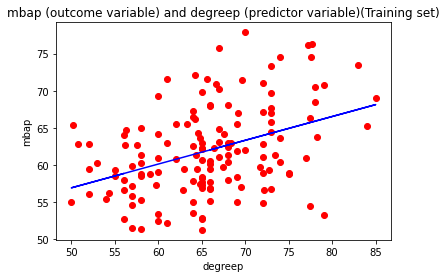

In [27]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('mbap (outcome variable) and degreep (predictor variable)(Training set)')
plt.xlabel('degreep')
plt.ylabel('mbap')
plt.show()

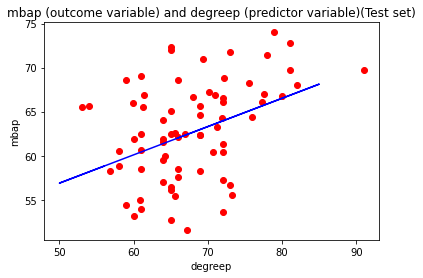

In [28]:
#visualizing the test set results
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('mbap (outcome variable) and degreep (predictor variable)(Test set)')
plt.xlabel('degreep')
plt.ylabel('mbap')
plt.show()

In [29]:
dataset = pd.read_csv('Placement_Data_Full_Class.csv')

In [30]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [31]:
dataset['salary'] = dataset['salary'].fillna(dataset['salary'].mean())

In [32]:
dataset['status']= dataset['status'].map({'Placed':1,'Not Placed':0})
dataset['workex']= dataset['workex'].map({'Yes':1,'No':0})
dataset['gender']= dataset['gender'].map({'M':1,'F':0})
dataset['hsc_b']= dataset['hsc_b'].map({'Central':1,'Others':0})
dataset['ssc_b']= dataset['ssc_b'].map({'Central':1,'Others':0})
dataset['degree_t']= dataset['degree_t'].map({'Sci&Tech':0,'Comm&Mgmt':1,'Others':2})
dataset['specialisation']= dataset['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})
dataset['hsc_s']= dataset['hsc_s'].map({'Commerce':0,'Science':1,'Arts':2})

In [33]:
X = dataset[['ssc_p','hsc_p','degree_p','etest_p','salary','workex','specialisation']]

In [34]:
y = dataset['status']

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.18)

In [36]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
nb.score(x_test,y_test)
y_pred = nb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n',cm)
print(nb.score(x_test,y_test)*100)

Confusion Matrix
 [[10  0]
 [ 0 29]]
100.0


In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n',cm)
print(dt.score(x_test,y_test)*100)

Confusion Matrix
 [[10  0]
 [ 0 29]]
100.0
